<a href="https://colab.research.google.com/github/rajeshvalluri/MNIST_TF/blob/master/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#modifications 21-09-202
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
!nvidia-smi -L

GPU 0: Tesla P4 (UUID: GPU-7acf9daa-ca3c-cb34-30b2-7fdcbd2b8a25)


In [5]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy import *
from PIL import Image, ImageOps
%matplotlib inline


In [6]:
#Load the MNIST files from Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [30]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [31]:
input_shape = 784

In [32]:
#Load data and labels into X_train and y_train respectively
X_train = []
y_train = []
for rows in data_list:
  tmp_row = np.asfarray(rows.split(',')[1:])
  tmp_row[tmp_row < 20.0] = 0.0
  X_train.append(tmp_row.reshape([28,28]))
  y_train.append(int(rows.split(',')[0]))

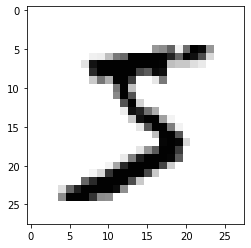

In [33]:
#print(X_train[0])
plt.pyplot.imshow(X_train[0],cmap='Greys',interpolation='None')

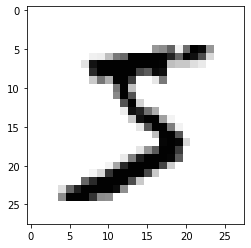

In [34]:
#Check a couple of images and their corresponding labels.
X_train = np.array(X_train)/255.0 + 0.01#scaling input data to be between 0 and 1
y_train = np.array(y_train)
plt.pyplot.imshow(X_train[0],cmap='Greys',interpolation='None')

In [35]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1) ,padding='same'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),padding='same'))
model.add(Flatten())
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units=10,activation='softmax'))
opt = tf.keras.optimizers.Adam()
metrics = 'accuracy'
loss = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,loss=loss,metrics=[metrics])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [36]:
print(X_train.shape)

(60000, 28, 28)


In [37]:
model.fit(X_train[...,np.newaxis],y_train,verbose=1,epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2122 - accuracy: 0.9351
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0537 - accuracy: 0.9840
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0390 - accuracy: 0.9882
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0294 - accuracy: 0.9911
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0252 - accuracy: 0.9916
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0200 - accuracy: 0.9939
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0172 - accuracy: 0.9947
Epoch 8/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0160 - accuracy: 0.9950
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0127 - accuracy: 0.9959
Epoch 10/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0116 - accura

In [38]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_test.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [40]:
model.save("//content/gdrive/My Drive/MNIST/trained_model")

INFO:tensorflow:Assets written to: //content/gdrive/My Drive/MNIST/trained_model/assets


In [41]:
#Load data and labels into X_test and y_test respectively
X_test = []
y_test = []
for rows in data_list:
  tmp_row = np.asfarray(rows.split(',')[1:])
  tmp_row[tmp_row < 20.0] = 0.0
  X_test.append(np.asfarray(tmp_row).reshape([28,28]))
  y_test.append(int(rows.split(',')[0]))
X_test = np.array(X_test)/255.0 + 0.01 #scaling test data
y_test = np.array(y_test)

In [42]:
#Evaluate the trained model on test data
model.evaluate(X_test[...,np.newaxis],y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9932


[0.036068689078092575, 0.9932000041007996]

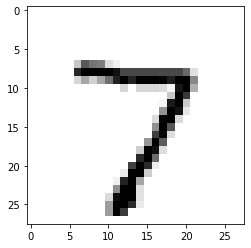

In [43]:
#Check a couple of images and their corresponding labels.
plt.pyplot.imshow(X_test[0],cmap='Greys',interpolation='None')
#print(X_test[1458])

In [44]:
pred_image = X_test[0]
print(pred_image.shape)
#pred_image[np.newaxis,...,np.newaxis]
np.argmax(model.predict(pred_image[np.newaxis,...,np.newaxis]))

(28, 28)


7

In [ ]:
pip install pillow

In [19]:
model = tensorflow.keras.models.load_model("//content/gdrive/My Drive/MNIST/trained_model")

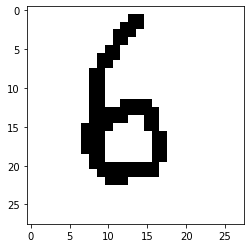

In [229]:
img = Image.open("//content/gdrive/My Drive/MNIST/six.jpg")
img = img.convert("L")
img = np.array(img.resize((28,28)))
img = (255.0 - img) 
img[img < 20.0] = 0
img[img > 5.0] = np.max(img)
img = img /255.0 * 0.99 + 0.01
plt.imshow(img,cmap='Greys',interpolation='None')

In [230]:
np.argmax(model.predict(img[np.newaxis,...,np.newaxis]))
#model.predict(img[np.newaxis,...,np.newaxis])

6

In [49]:
#The following additions to the code are to draw bounding boxes around the digits so that we can get them as close as possible to the MNIST dataset
import cv2

In [218]:
image = cv2.imread("//content/gdrive/My Drive/MNIST/nine.jpg") #load the image file
# image[image < 20.0] = 0
# image[image > 20.0] = np.max(image)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY) #Convert it into grayscale

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
print(contours) #all possible candidates for contours
print(np.size(contours))

In [219]:
preprocessed_digits = []
count = 0
for c in contours:
    count += 1
    x,y,w,h = cv2.boundingRect(c)
    #print(x,y,w,h)
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2) # Drawing a green box around the number.
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    #padding the resized digit with 5 pixels in each direction
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print ("count =",count)

count = 1


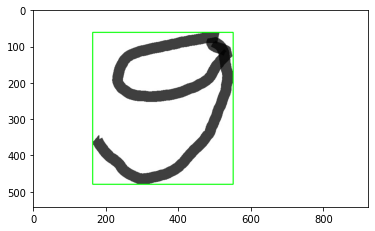

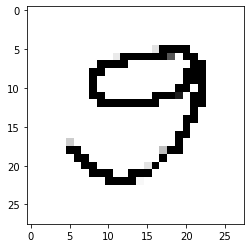

In [223]:
inp = np.array(preprocessed_digits)
img = np.array(preprocessed_digits[0])
img = (255.0 - img) 
#img[img < 20.0] = 0
#img[img > 5.0] = np.max(img)
img = img /255.0 * 0.99 + 0.01
plt.figure()
plt.imshow(image, cmap="gray")
plt.figure()
plt.imshow(img, cmap="gray")

In [224]:
np.argmax(model.predict(img[np.newaxis,...,np.newaxis]))

8